# Netlix Case Study

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem:**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

**Dataset:**

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset as daatframe
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape #showing no.of rows and columns

(8807, 12)

In [4]:
df.dtypes # data types of all the features

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# count of all the null values in all the features
np.round((df.isna().sum()/df.shape[0])*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [7]:
# Getting total number of unique values in each columns
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

1. Handling Missing Values

In [8]:
# missing values in the duration feature
df[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [9]:
ind = df[df.duration.isna()].index

In [10]:
ind

Index([5541, 5794, 5813], dtype='int64')

In [11]:
#imputing the missing values in duration feature through forward fill
df.loc[ind] = df.loc[ind].fillna(method = "ffill", axis=1)

In [12]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [13]:
# Rating values having duration replaced with string "Not Available"
df.loc[ind, "rating"] = "Not Available" 

In [14]:
#checking the null values of rating feature
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [15]:
# getting the indices having null values of rating feature
indices = df[df.rating.isna()].index

In [16]:
# replacing all the Null values of rating feature to "Not Available"
df.loc[indices, "rating"] = "Not Available"

In [17]:
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [18]:
# checking again null values in all the features
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [20]:
# since the date_added feature has 10 missing values - we are dropping those values
df.drop(df[df["date_added"].isna()].index, axis=0, inplace=True)

In [21]:
df.shape

(8797, 12)

In [22]:
df["date_added"].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [23]:
df["date_added"] = df["date_added"].str.strip()

In [24]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [25]:
df["year_added"] = df["date_added"].dt.year

In [26]:
df["month_added"] = df["date_added"].dt.month

In [27]:
df[["date_added", "year_added", "month_added"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


In [28]:
# checking the dataframe gain
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [29]:
# checking null values
df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

In [30]:
df[df.date_added.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


**2. Non-Graphical-Analysis**

In [31]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

2. Divide the data into movies and tv_show

In [32]:
# dividing the unique values of type feature into two dataframes
movies = df[df.type == "Movie"]
tv_show = df[df.type == "TV Show"]

In [33]:
movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9


In [34]:
movies.duration.value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [35]:
# removing the "min" in duration feature
movies["duration"] = movies.duration.str[:-3].apply(lambda x: x.strip())

In [36]:
# converting the datatype of duration as int
movies["duration"] = movies.duration.astype("int")

In [37]:
movies.duration.info()

<class 'pandas.core.series.Series'>
Index: 6131 entries, 0 to 8806
Series name: duration
Non-Null Count  Dtype
--------------  -----
6131 non-null   int64
dtypes: int64(1)
memory usage: 95.8 KB


In [38]:
movies.rating.value_counts()

rating
TV-MA            2062
TV-14            1427
R                 797
TV-PG             540
PG-13             490
PG                287
TV-Y7             139
TV-Y              131
TV-G              126
NR                 75
G                  41
Not Available       5
TV-Y7-FV            5
NC-17               3
UR                  3
Name: count, dtype: int64

In [39]:
# tv_show
tv_show.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


In [40]:
tv_show.duration.value_counts()

duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

In [41]:
# removing the "seasons" from duration feature
tv_show["duration"] = tv_show.duration.str[:-7].apply(lambda x:x.strip()).astype("int")

In [42]:
movies.rename({"duration":"duration_in_min"}, axis=1, inplace=True)
tv_show.rename({"duration":"duration_in_season"}, axis=1, inplace=True)

In [43]:
tv_show.rating.value_counts()

rating
TV-MA            1143
TV-14             730
TV-PG             321
TV-Y7             194
TV-Y              175
TV-G               94
NR                  4
R                   2
Not Available       2
TV-Y7-FV            1
Name: count, dtype: int64

In [44]:
movies.duration_in_min

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration_in_min, Length: 6131, dtype: int64

In [45]:
tv_show.duration_in_season

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration_in_season, Length: 2666, dtype: int64

In [46]:
# when the first movie added on Netflix and when is the most recent movie added on netflix data?
td = pd.Series((df["date_added"].min().strftime("%B %Y"), df["date_added"].max().strftime("%B %Y")))
td.index = ["first", "Most_recent"]
td

first            January 2008
Most_recent    September 2021
dtype: object

The most recent movied added on the netflix was on September 2021 and the first movies added on Netflix was on January 2008, showing before January 2008 - Netflix was not active.

In [47]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_min,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [48]:
movies.shape

(6131, 14)

In [49]:
# exploding the director feature
movies["director"] = movies.director.apply(lambda x: str(x).split(","))
movies = movies.explode("director")
movies.shape

(6854, 14)

In [50]:
# exploding the cast feature
movies["cast"] = movies.cast.apply(lambda x: str(x).split(","))
movies = movies.explode("cast")
movies.shape

(50098, 14)

In [51]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50098 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          50098 non-null  object        
 1   type             50098 non-null  object        
 2   title            50098 non-null  object        
 3   director         50098 non-null  object        
 4   cast             50098 non-null  object        
 5   country          47105 non-null  object        
 6   date_added       50098 non-null  datetime64[ns]
 7   release_year     50098 non-null  object        
 8   rating           50098 non-null  object        
 9   duration_in_min  50098 non-null  int64         
 10  listed_in        50098 non-null  object        
 11  description      50098 non-null  object        
 12  year_added       50098 non-null  int32         
 13  month_added      50098 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), ob

In the movies dataframe, country feature has null values, we have to impute it

In [52]:
ind = movies[movies.country.isna()].index


#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director
# and imputes in place of nulls the corresponding mode

for i in movies[movies['country'].isnull()]['director'].unique():
  if i in movies[~movies['country'].isnull()]['director'].unique():
    imp=movies[movies['director']==i]['country'].mode().values[0]
    movies.loc[movies['director']==i,'country']=movies.loc[movies['director']==i,'country'].fillna(imp)

In [53]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50098 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          50098 non-null  object        
 1   type             50098 non-null  object        
 2   title            50098 non-null  object        
 3   director         50098 non-null  object        
 4   cast             50098 non-null  object        
 5   country          48244 non-null  object        
 6   date_added       50098 non-null  datetime64[ns]
 7   release_year     50098 non-null  object        
 8   rating           50098 non-null  object        
 9   duration_in_min  50098 non-null  int64         
 10  listed_in        50098 non-null  object        
 11  description      50098 non-null  object        
 12  year_added       50098 non-null  int32         
 13  month_added      50098 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), ob

In [54]:
movies["country"] = movies["country"].fillna("Not Available")

In [55]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50098 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          50098 non-null  object        
 1   type             50098 non-null  object        
 2   title            50098 non-null  object        
 3   director         50098 non-null  object        
 4   cast             50098 non-null  object        
 5   country          50098 non-null  object        
 6   date_added       50098 non-null  datetime64[ns]
 7   release_year     50098 non-null  object        
 8   rating           50098 non-null  object        
 9   duration_in_min  50098 non-null  int64         
 10  listed_in        50098 non-null  object        
 11  description      50098 non-null  object        
 12  year_added       50098 non-null  int32         
 13  month_added      50098 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), ob

In [56]:
# using group by to show the total count of the movies by year and month
s = movies.groupby(["year_added", "month_added"])["show_id"].count().reset_index()
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year_added   105 non-null    int32
 1   month_added  105 non-null    int32
 2   show_id      105 non-null    int64
dtypes: int32(2), int64(1)
memory usage: 1.8 KB


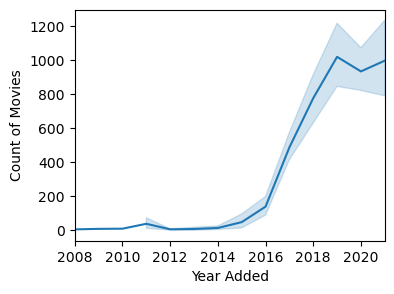

In [57]:
plt.figure(figsize=(4, 3))
sns.lineplot(x=s["year_added"], y=s["show_id"])
plt.xlabel("Year Added")  # Corrected from xtitle to xlabel
plt.ylabel("Count of Movies")  # Corrected from ytitle to ylabel
plt.xlim(2008, 2021)  # Corrected from xlimit to xlim
plt.show()

In [58]:
s = movies.groupby("director").agg({"title":"nunique"}).sort_values(by = "title", ascending=False).reset_index()[1:12]
s

,director,title
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Suhas Kadav,16
5,Jay Karas,15
6,Marcus Raboy,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Youssef Chahine,12
10,Jay Chapman,12


**Observation:**

Director Rajiv Chilake has direct most number of movies as per the given dataset.

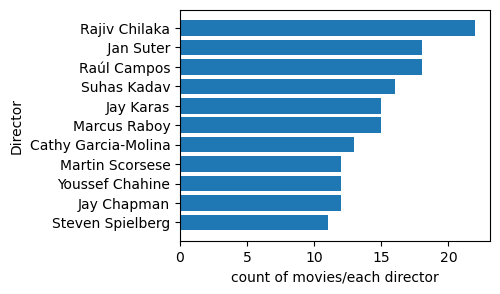

In [59]:
plt.figure(figsize=(4,3))
plt.barh(y = s["director"][::-1], width = s["title"][::-1])
plt.xlabel("count of movies/each director")
plt.ylabel("Director")
plt.show()

Rajiv Chilaka directed most number of movies as per the given data

In [60]:
s = movies.groupby("country").agg({"title":"nunique"}).sort_values(by = "title", ascending=False).reset_index()[:12]
s

,country,title
0,United States,2144
1,India,949
2,Not Available,246
3,United Kingdom,210
4,Canada,122
5,Egypt,99
6,Spain,97
7,Nigeria,96
8,Japan,84
9,Indonesia,78


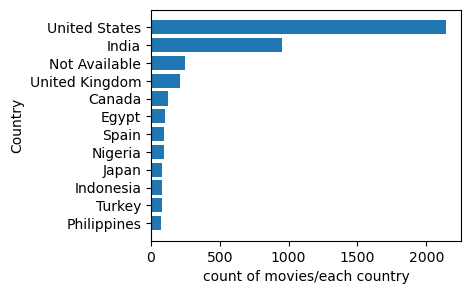

In [61]:
plt.figure(figsize=(4,3))
plt.barh(y = s["country"][::-1], width = s["title"][::-1])
plt.xlabel("count of movies/each country")
plt.ylabel("Country")
plt.show()

The most number of movies on the Netflix are from United States and India as per the data

In [62]:
s = movies.groupby(["country", "director"]).agg({"title":"nunique"}).sort_values(by = "title", ascending = False)
s

title
country        director                       
United States  nan                         117
India          Rajiv Chilaka                22
               Suhas Kadav                  16
United Kingdom nan                          15
United States  Marcus Raboy                 15
...                                        ...
Mexico         Bernardo Arellano             1
               Andres Clariond               1
               Alfonso Serrano Maturino      1
               Alfonso Arau                  1
Zimbabwe       Tomas Brickhill               1

[5308 rows x 1 columns]

Tv_shows

In [63]:
for i in tv_show[tv_show['country'].isnull()]['director'].unique():
  if i in tv_show[~tv_show['country'].isnull()]['director'].unique():
    imp=tv_show[tv_show['director']==i]['country'].mode().values[0]
    tv_show.loc[tv_show['director']==i,'country']=tv_show.loc[tv_show['director']==i,'country'].fillna(imp)

In [64]:
tv_show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 1 to 8803
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             2666 non-null   object        
 1   type                2666 non-null   object        
 2   title               2666 non-null   object        
 3   director            230 non-null    object        
 4   cast                2316 non-null   object        
 5   country             2277 non-null   object        
 6   date_added          2666 non-null   datetime64[ns]
 7   release_year        2666 non-null   object        
 8   rating              2666 non-null   object        
 9   duration_in_season  2666 non-null   int64         
 10  listed_in           2666 non-null   object        
 11  description         2666 non-null   object        
 12  year_added          2666 non-null   int32         
 13  month_added         2666 non-null   int32         
dt

In [65]:
s = tv_show.groupby("year_added").agg({"show_id":"nunique"}).sort_values(by="show_id", ascending=False).reset_index()
s

,year_added,show_id
0,2020,595
1,2019,592
2,2021,505
3,2018,412
4,2017,349
5,2016,176
6,2015,26
7,2013,5
8,2014,5
9,2008,1


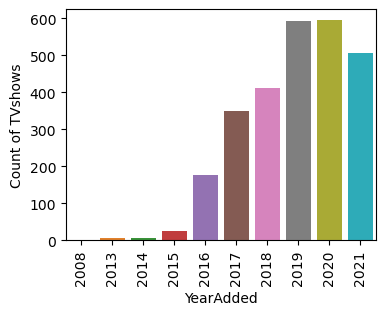

In [66]:
plt.figure(figsize=(4,3))
sns.barplot(x = s["year_added"], y=s["show_id"])
plt.xlabel("YearAdded")
plt.ylabel("Count of TVshows")
plt.xticks(rotation=90)
plt.show()

In [67]:
tv_show["director"] = tv_show["director"].apply(lambda x: str(x).split(","))
tv_show = tv_show.explode("director")


Most number of tv_shows are added on Netflix in 2019 and 2020

In [68]:
t = tv_show.groupby("director")["show_id"].count().to_frame("Total_tvshows").sort_values(by = "Total_tvshows", ascending=False).reset_index()[1:12]
t

,director,Total_tvshows
1,Ken Burns,3
2,Alastair Fothergill,3
3,Gautham Vasudev Menon,2
4,Iginio Straffi,2
5,Joe Berlinger,2
6,Jung-ah Im,2
7,Rob Seidenglanz,2
8,Shin Won-ho,2
9,Stan Lathan,2
10,Hsu Fu-chun,2


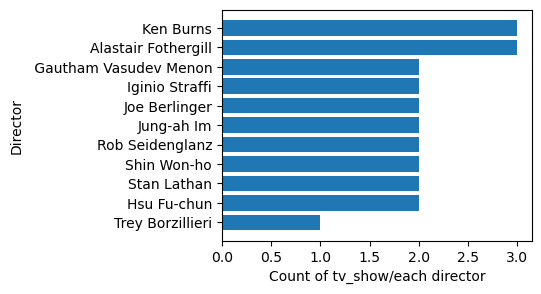

In [69]:
plt.figure(figsize=(4,3))
plt.barh(y = t["director"][::-1], width=t["Total_tvshows"][::-1])
plt.xlabel("Count of tv_show/each director")
plt.ylabel("Director")
plt.show()

#plt.figure(figsize=(4,3))
#plt.barh(y = s["country"][::-1], width = s["title"][::-1])
#plt.xlabel("count of movies/each country")
#plt.ylabel("Country")
#plt.show()

Rob Seidenglanz and Gautham Vasudev Menon have directed most number of tv_shows on Netflix as per the data.

In [70]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_season,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,nan,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


In [71]:
tv_show["listed_in"] = tv_show["listed_in"].apply(lambda x: str(x).split(","))
tv_show = tv_show.explode("listed_in")
                                        

In [72]:
t = tv_show.groupby("listed_in")[["show_id"]].count().sort_values(by = "show_id", ascending=False).reset_index()[:12]
t

,listed_in,show_id
0,International TV Shows,805
1,TV Dramas,725
2,International TV Shows,586
3,TV Comedies,463
4,Crime TV Shows,409
5,Kids' TV,387
6,Romantic TV Shows,341
7,British TV Shows,254
8,Docuseries,233
9,Docuseries,181


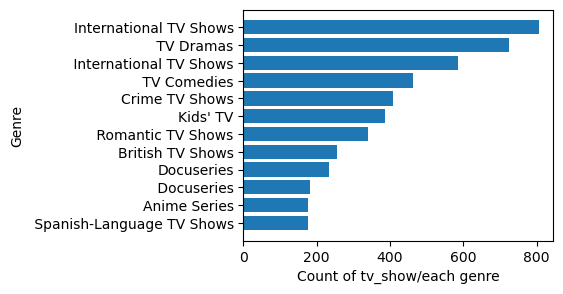

In [73]:
plt.figure(figsize=(4,3))
plt.barh(y = t["listed_in"][::-1], width=t["show_id"][::-1])
plt.xlabel("Count of tv_show/each genre")
plt.ylabel("Genre")
plt.show()


In [74]:
t = tv_show.groupby("country")["show_id"].count().to_frame("Total Tv_shows").sort_values(by = "Total Tv_shows", ascending=False).reset_index()[:12]
t

,country,Total Tv_shows
0,United States,1396
1,United Kingdom,583
2,South Korea,471
3,Japan,387
4,Taiwan,228
5,India,209
6,Spain,144
7,Canada,123
8,France,122
9,Mexico,116


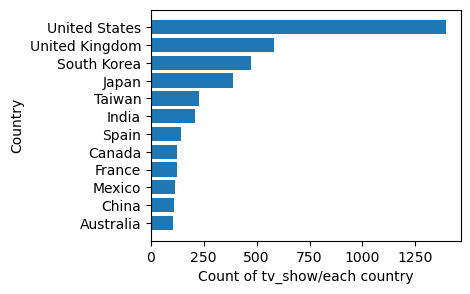

In [75]:
plt.figure(figsize=(4,3))
plt.barh(y = t["country"][::-1], width=t["Total Tv_shows"][::-1])
plt.xlabel("Count of tv_show/each country")
plt.ylabel("Country")
plt.show()

In [76]:
tv_show.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_season,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9


In [77]:
tv_show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6277 entries, 1 to 8803
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             6277 non-null   object        
 1   type                6277 non-null   object        
 2   title               6277 non-null   object        
 3   director            6277 non-null   object        
 4   cast                5542 non-null   object        
 5   country             5388 non-null   object        
 6   date_added          6277 non-null   datetime64[ns]
 7   release_year        6277 non-null   object        
 8   rating              6277 non-null   object        
 9   duration_in_season  6277 non-null   int64         
 10  listed_in           6277 non-null   object        
 11  description         6277 non-null   object        
 12  year_added          6277 non-null   int32         
 13  month_added         6277 non-null   int32         
dt

In [78]:
# the oldest and most recent movie/Tv show released on the netflix in which year?
df.release_year.min(), df.release_year.max()

(1925, 2021)

In [79]:
df.loc[(df["release_year"] == df.release_year.min()) | (df["release_year"] == df.release_year.max())].sort_values("release_year")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,2021-04-28,2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane...",2021,4
967,s968,TV Show,Headspace Guide to Sleep,NaN,Evelyn Lewis Prieto,NaN,2021-04-28,2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...,2021,4
968,s969,TV Show,Sexify,NaN,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,2021-04-28,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...,2021,4
972,s973,TV Show,Fatma,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,2021-04-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea...",2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,s467,TV Show,My Unorthodox Life,NaN,NaN,NaN,2021-07-14,2021,TV-MA,1 Season,Reality TV,"Follow Julia Haart, Elite World Group CEO and ...",2021,7
467,s468,Movie,Private Network: Who Killed Manuel Buendía?,Manuel Alcalá,Daniel Giménez Cacho,NaN,2021-07-14,2021,TV-MA,100 min,"Documentaries, International Movies",A deep dive into the work of renowned Mexican ...,2021,7
468,s469,Movie,The Guide to the Perfect Family,Ricardo Trogi,"Louis Morissette, Émilie Bierre, Catherine Cha...",NaN,2021-07-14,2021,TV-MA,102 min,"Comedies, Dramas, International Movies","A couple in Québec deals with the pitfalls, pr...",2021,7
471,s472,Movie,Day of Destiny,"Akay Mason, Abosi Ogba","Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...",NaN,2021-07-13,2021,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...","With their family facing financial woes, two t...",2021,7


In [80]:
df.groupby(["type", "rating"])["show_id"].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
         UR                  3
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

In [81]:
#columns having maximum null values
df["country"].value_counts()

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [82]:
country_tb = df[["show_id", "type", "country"]]
#country_tb.dropna(inplace=True)
#country_tb["country"] = country_tb["country"].apply(lambda x: x.split())

In [83]:
country_tb.shape

(8797, 3)

In [84]:
country_tb.dropna(inplace=True)
country_tb["country"] = country_tb["country"].str.split(",")

In [85]:
country_tb.head()

,show_id,type,country
0,s1,Movie,[United States]
1,s2,TV Show,[South Africa]
4,s5,TV Show,[India]
7,s8,Movie,"[United States, Ghana, Burkina Faso, United..."
8,s9,TV Show,[United Kingdom]


In [86]:
country_tb = country_tb.explode("country")
country_tb.head()

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana


In [87]:
country_tb.shape

(10010, 3)

In [88]:
country_tb["country"] = country_tb["country"].str.strip()

In [89]:
country_tb[country_tb["country"] == ""]

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [90]:
country_tb = country_tb.loc[country_tb["country"] != ""]

In [91]:
country_tb["country"].nunique()

122

In [92]:
x = country_tb.groupby(["country", "type"])["show_id"].count().reset_index()
x.head()

,country,type,show_id
0,Afghanistan,Movie,1
1,Albania,Movie,1
2,Algeria,Movie,3
3,Angola,Movie,1
4,Argentina,Movie,71


In [93]:
x.pivot(index = ["country"], columns = "type", values="show_id").sort_values("Movie", ascending=False)

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [94]:
y = country_tb.pivot_table(index = ["country"], columns = "type", values = "show_id", aggfunc = "count").sort_values("Movie", ascending=False)
y

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


In [95]:
#director column
df["director"].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [96]:
dir_tb = df[["show_id", "type", "director"]]

In [97]:
dir_tb.shape

(8797, 3)

In [98]:
dir_tb.dropna(inplace=True)
dir_tb["director"] = dir_tb["director"].str.split(",")
dir_tb

,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]
...,...,...,...
8801,s8802,Movie,[Majid Al Ansari]
8802,s8803,Movie,[David Fincher]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [99]:
dir_tb = dir_tb.explode("director")

In [100]:
dir_tb["director"] = dir_tb.director.str.strip()

In [101]:
dir_tb.shape

(6978, 3)

In [102]:
dir_tb.director.apply(lambda x: True if len(x) == 0 else False).value_counts()

director
False    6978
Name: count, dtype: int64

In [103]:
dir_tb.director.nunique()

4993

In [104]:
z = dir_tb.groupby(["director", "type"])["show_id"].count().reset_index()
z

,director,type,show_id
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
5071,Éric Warin,Movie,1
5072,Ísold Uggadóttir,Movie,1
5073,Óskar Thór Axelsson,Movie,1
5074,Ömer Faruk Sorak,Movie,3


In [105]:
z.pivot(index = ["director"], columns = "type", values = "show_id").sort_values("Movie", ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [106]:
dir_tb.pivot_table(index = ["director"], columns = "type", values = "show_id", aggfunc = "count").sort_values("Movie", ascending=False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


In [107]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [108]:
genre_tb = df[["show_id", "type", "listed_in"]]

In [109]:
genre_tb.head()

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,"Docuseries, Reality TV"
4,s5,TV Show,"International TV Shows, Romantic TV Shows, TV ..."


In [110]:
genre_tb["listed_in"] = genre_tb["listed_in"].str.split(",")


In [111]:
genre_tb.head()

,show_id,type,listed_in
0,s1,Movie,[Documentaries]
1,s2,TV Show,"[International TV Shows, TV Dramas, TV Myste..."
2,s3,TV Show,"[Crime TV Shows, International TV Shows, TV ..."
3,s4,TV Show,"[Docuseries, Reality TV]"
4,s5,TV Show,"[International TV Shows, Romantic TV Shows, ..."


In [112]:
genre_tb = genre_tb.explode("listed_in")
genre_tb["listed_in"] = genre_tb["listed_in"].str.strip()

In [113]:
genre_tb.head()

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows


In [114]:
genre_tb.listed_in.nunique()

42

In [115]:
genre_tb.groupby("type")["listed_in"].nunique()

type
Movie      20
TV Show    22
Name: listed_in, dtype: int64

In [116]:
d = genre_tb.groupby(["listed_in", "type"])["show_id"].count().reset_index()

In [117]:
d.pivot(index = ["listed_in"], columns="type", values="show_id").sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


In [118]:
#exploring cast columns
cast_tb = df[["show_id", "type", "cast"]]
cast_tb.dropna(inplace=True)
cast_tb["cast"] = cast_tb.cast.str.split(",")
cast_tb = cast_tb.explode("cast")
cast_tb.head()

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel


In [119]:
cast_tb["cast"] = cast_tb.cast.str.strip()

In [120]:
cast_tb.cast.nunique()

36403

In [121]:
f = cast_tb.groupby(["cast","type"])["show_id"].count().reset_index()
f.pivot(index = "cast", columns = "type", values = "show_id").sort_values("TV Show", ascending=False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


**3. Visual Analysis - Univariate and Bivariate**

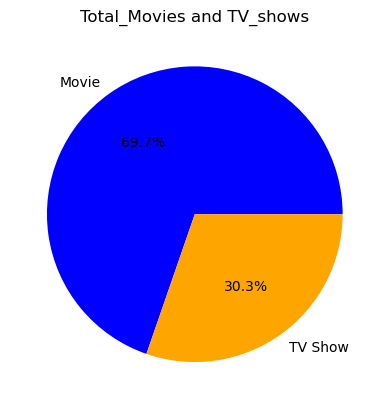

In [122]:
type = df.type.value_counts()
plt.pie(type, labels = type.index, autopct = "%1.1f%%", colors = ["blue", "orange"])
plt.title("Total_Movies and TV_shows")
plt.show()

In [123]:
t = df.groupby(["year_added", "type"])["show_id"].count().reset_index()
t.rename({"show_id":"Total_movies/Tv_show"}, axis=1, inplace=True)

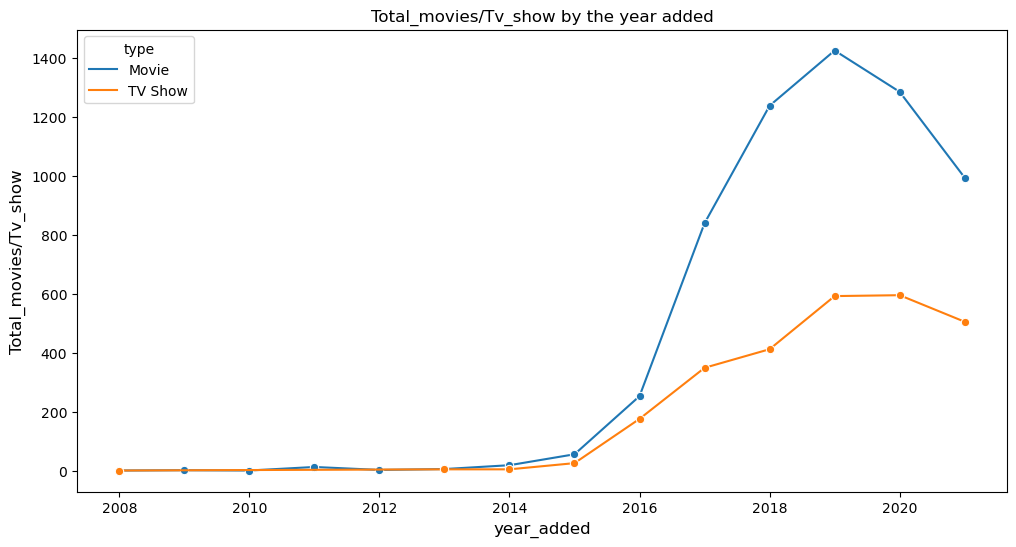

In [124]:
plt.figure(figsize=(12,6))
sns.lineplot(data=t, x="year_added", y = "Total_movies/Tv_show", hue="type", marker="o")
plt.xlabel("year_added", fontsize=12)
plt.ylabel("Total_movies/Tv_show", fontsize=12)
plt.title("Total_movies/Tv_show by the year added", fontsize=12)
plt.show()

In [125]:
t = df.groupby(["release_year", "type"])["show_id"].count().reset_index()
t.rename({"show_id":"Total_movies/Tv_show"}, axis=1, inplace=True)
t

,release_year,type,Total_movies/Tv_show
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


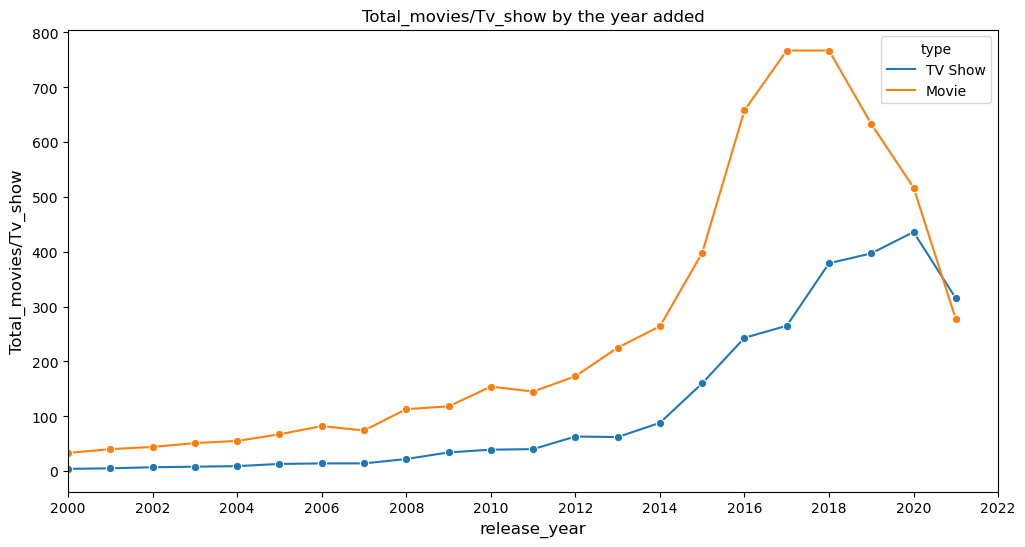

In [126]:
plt.figure(figsize=(12,6))
sns.lineplot(data=t, x="release_year", y = "Total_movies/Tv_show", hue="type", marker="o")
plt.xlabel("release_year", fontsize=12)
plt.ylabel("Total_movies/Tv_show", fontsize=12)
plt.title("Total_movies/Tv_show by the year added", fontsize=12)
plt.xlim(left = 2000, right = 2021)
plt.xticks(np.arange(2000,2023,2))
plt.show()

In [127]:
# total movies directed by top 10 directors 
top10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb["director"].isin(top10_dir)]

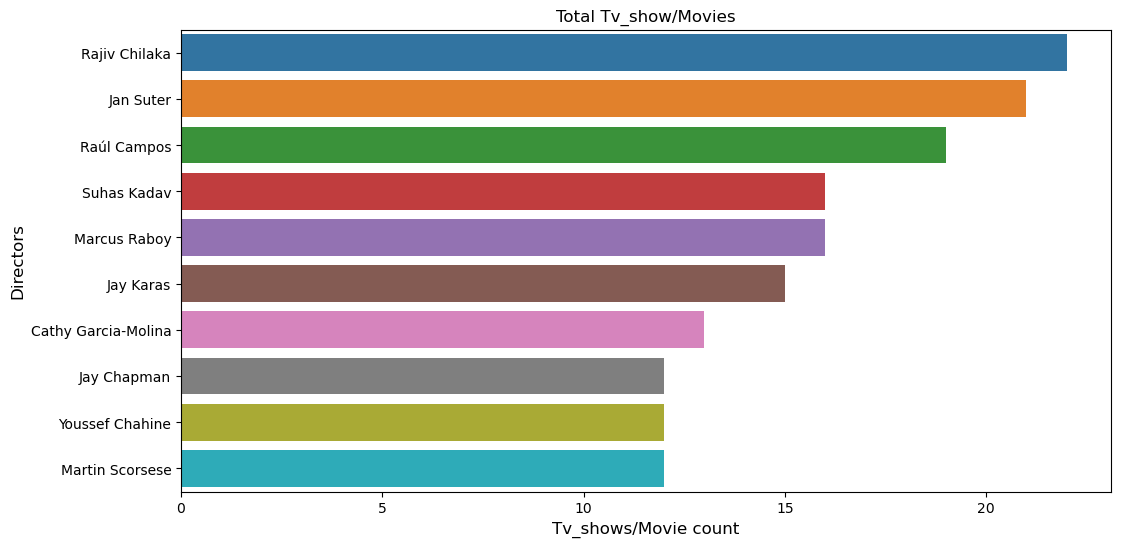

In [128]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_new, y = "director", order = top10_dir, orient = "h")
plt.xlabel("Tv_shows/Movie count", fontsize=12)
plt.ylabel("Directors", fontsize=12)
plt.title("Total Tv_show/Movies")
plt.show()

In [129]:
q = pd.DataFrame(np.unique(dir_tb["director"], return_counts=True))
q

,0,1,2,3,4,5,6,7,8,9,...,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992
0,A. L. Vijay,A. Raajdheep,A. Salaam,A.R. Murugadoss,Aadish Keluskar,Aamir Bashir,Aamir Khan,Aanand Rai,Aaron Burns,Aaron Hancox,...,Ángel Gómez Hernández,Ángeles Reiné,Çagan Irmak,Éric Judor,Éric Toledano,Éric Warin,Ísold Uggadóttir,Óskar Thór Axelsson,Ömer Faruk Sorak,Şenol Sönmez
1,2,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,3,2


In [130]:
x = dir_tb.director.value_counts()
x

director
Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: count, Length: 4993, dtype: int64

In [131]:
def calculate_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    return outliers


def calculate_max_occured_value(data):
    unique_values, value_counts = np.unique(data, return_counts = True)
    max_count_index = np.argmax(value_counts)
    max_occured_value = unique_values[max_count_index]
    return max_occured_value

In [132]:
outliers = calculate_outliers(x)
set(outliers)

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 21, 22}

In [133]:
max_occured_value = calculate_max_occured_value(dir_tb.director)
max_occured_value 

'Rajiv Chilaka'

In [134]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


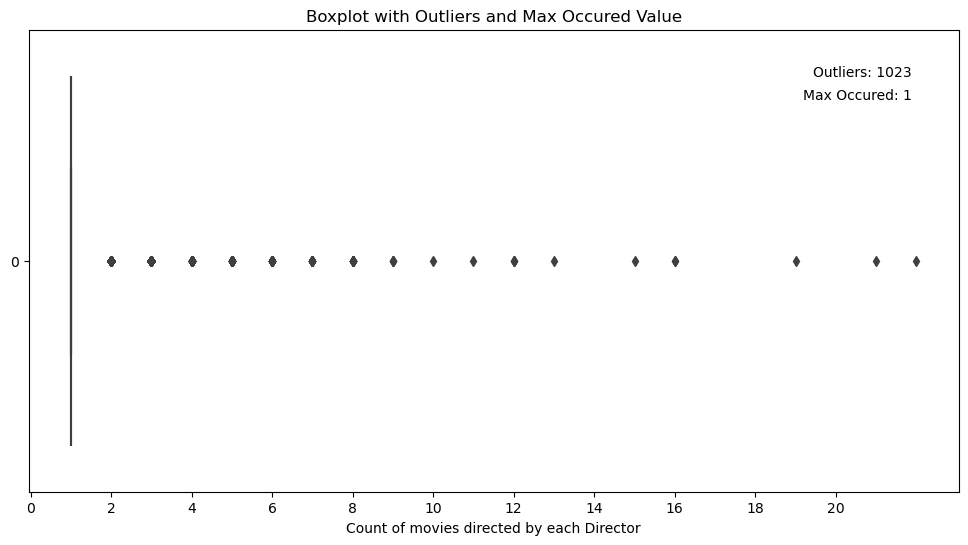

In [137]:
plt.figure(figsize=(12,6))
sns.boxplot(data = x, showfliers=True, whis=1.5, orient="h")

#calculate the outliers and maximum occured value
outliers = calculate_outliers(x)
max_occured_value = calculate_max_occured_value(x)

#Annotate the plot
plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform = plt.gca().transAxes, ha="right")
plt.text(0.95, 0.85, f"Max Occured: {max_occured_value}", transform=plt.gca().transAxes, ha="right")

plt.xlabel("Count of movies directed by each Director")
plt.xticks(np.arange(0,22,2))
plt.title("Boxplot with Outliers and Max Occured Value")

plt.show() 

Observation:

It is Observed that maximum occured value is 1, which means maximum directors on the Netflix have directed 1 movie/Tv show. There are few directors who have directed more than 1 movies/tv shows and they are outliers.

In [140]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [141]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


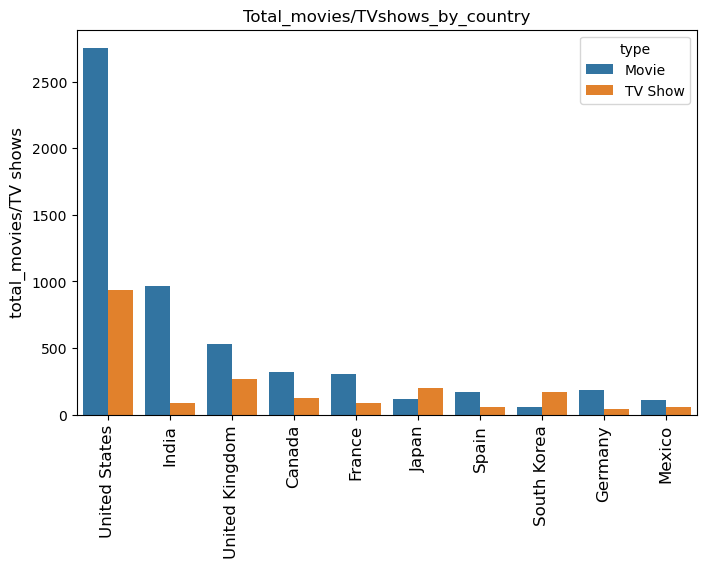

In [142]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [143]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

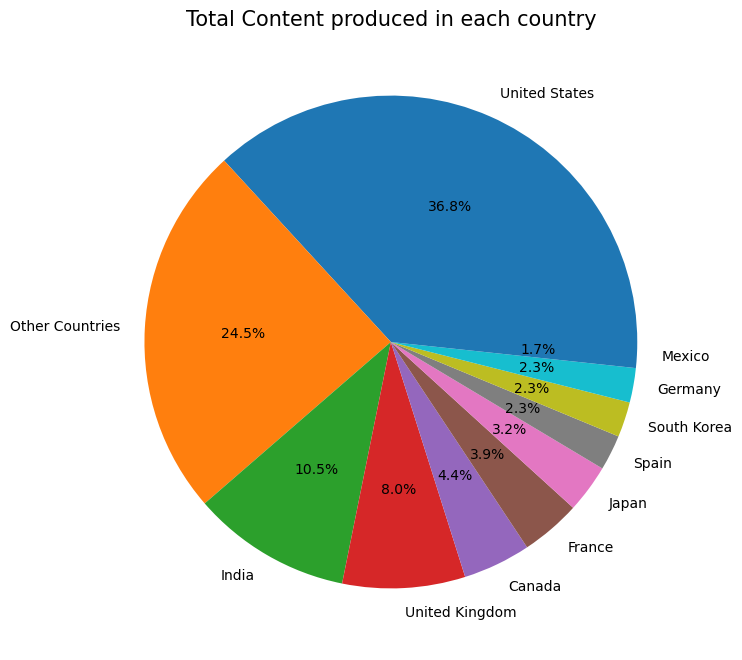

In [144]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

**Observation:**

United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
Maximum content of Netflix which is around 75% , is coming from these top 10 countries. Rest of the world only contributes 25% of the content.

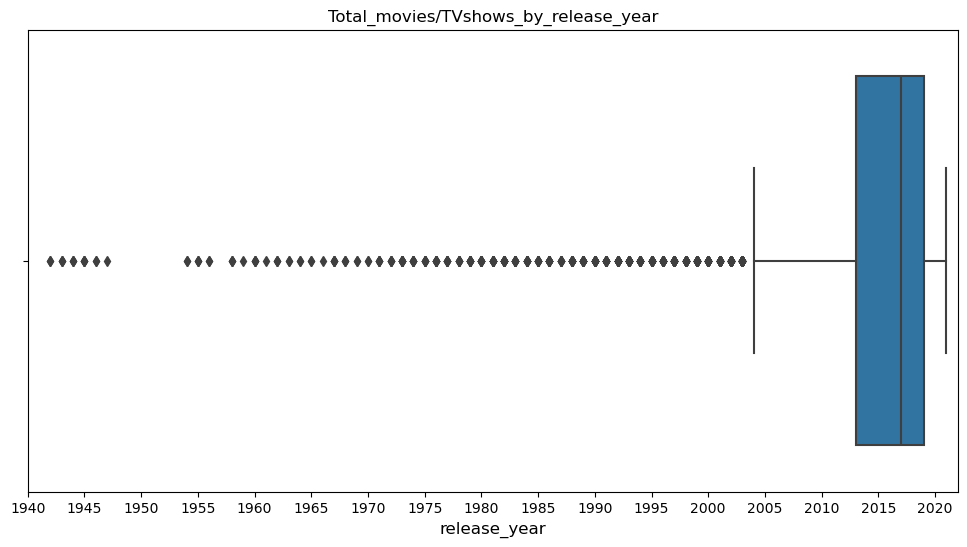

In [145]:
#  Total content distribution by release year of the content
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

**Observation:**

Netflix have major content which is released in the year range 2000-2021
It seems that the content older than year 2000 is almost missing from the Netflix.

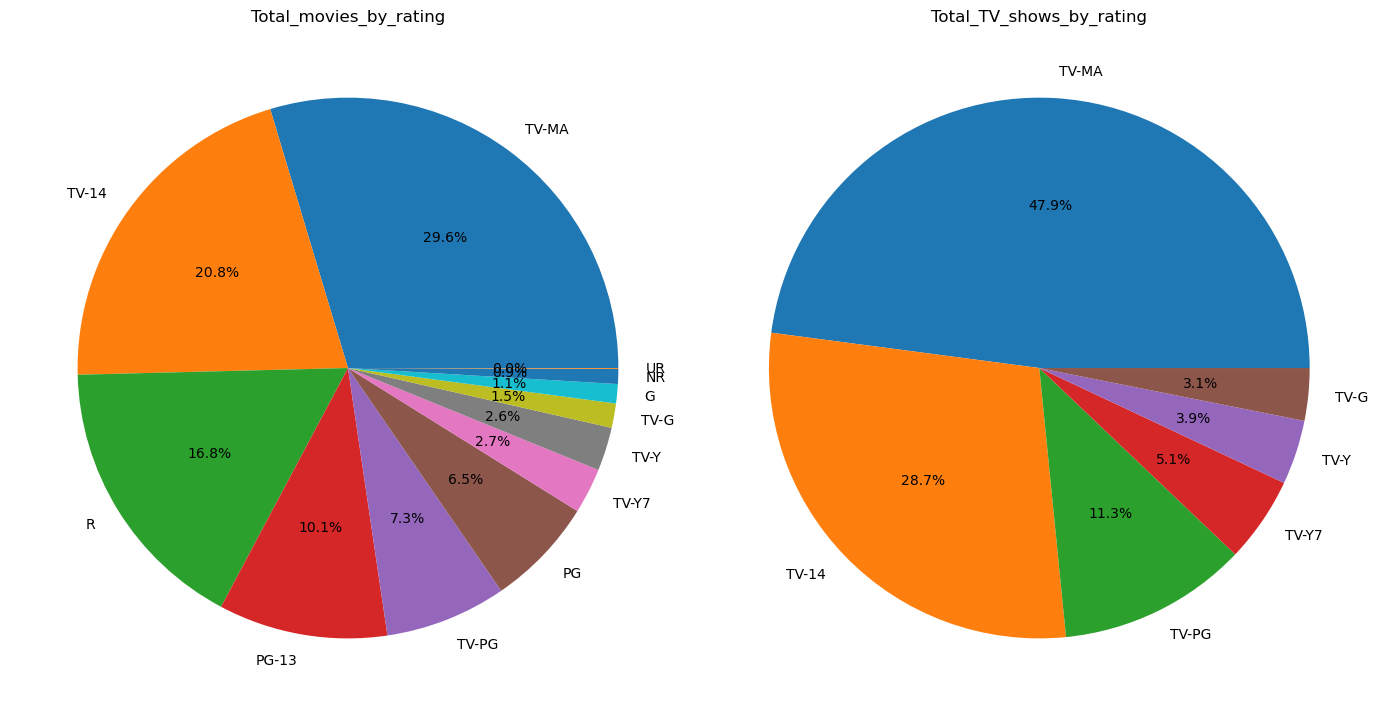

In [146]:
# Total movies/TV shows distribution by rating of the content
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_show.loc[~tv_show.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Observation: 

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

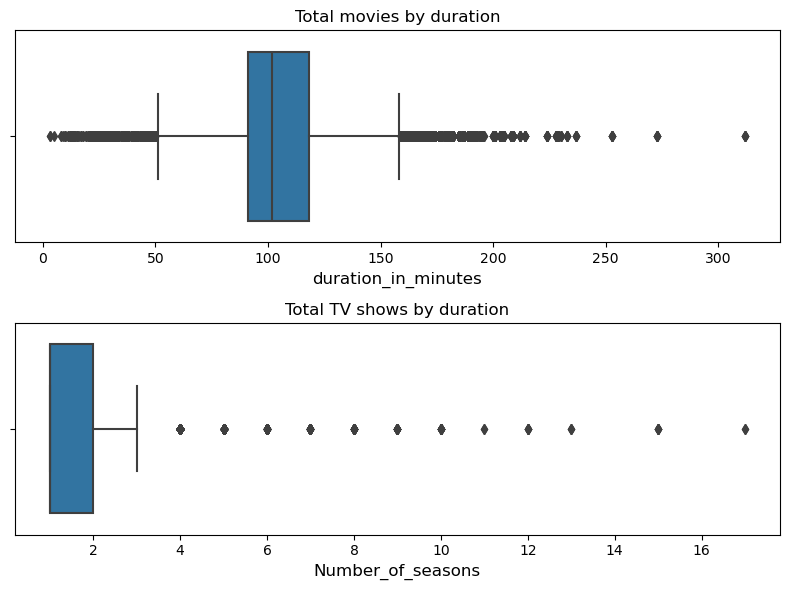

In [147]:
#  Total movies/TV shows distribution by duration of the content
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_min' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_show , x = 'duration_in_season' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

Observation: 

1. Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot)
2. TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers


In [148]:
# Total movies/TV shows in each Genre
top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]

In [149]:
top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

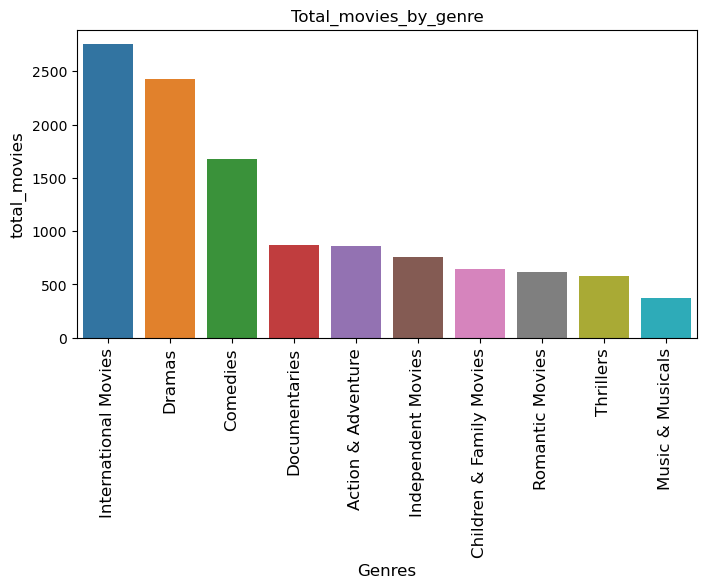

In [150]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

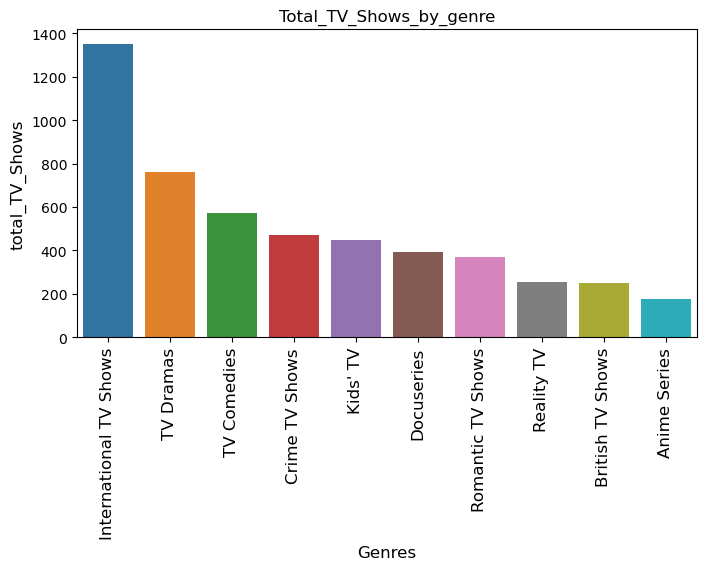

In [151]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

Observation: 

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

**5. Bivariate Analysis**

In [152]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]

In [153]:
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

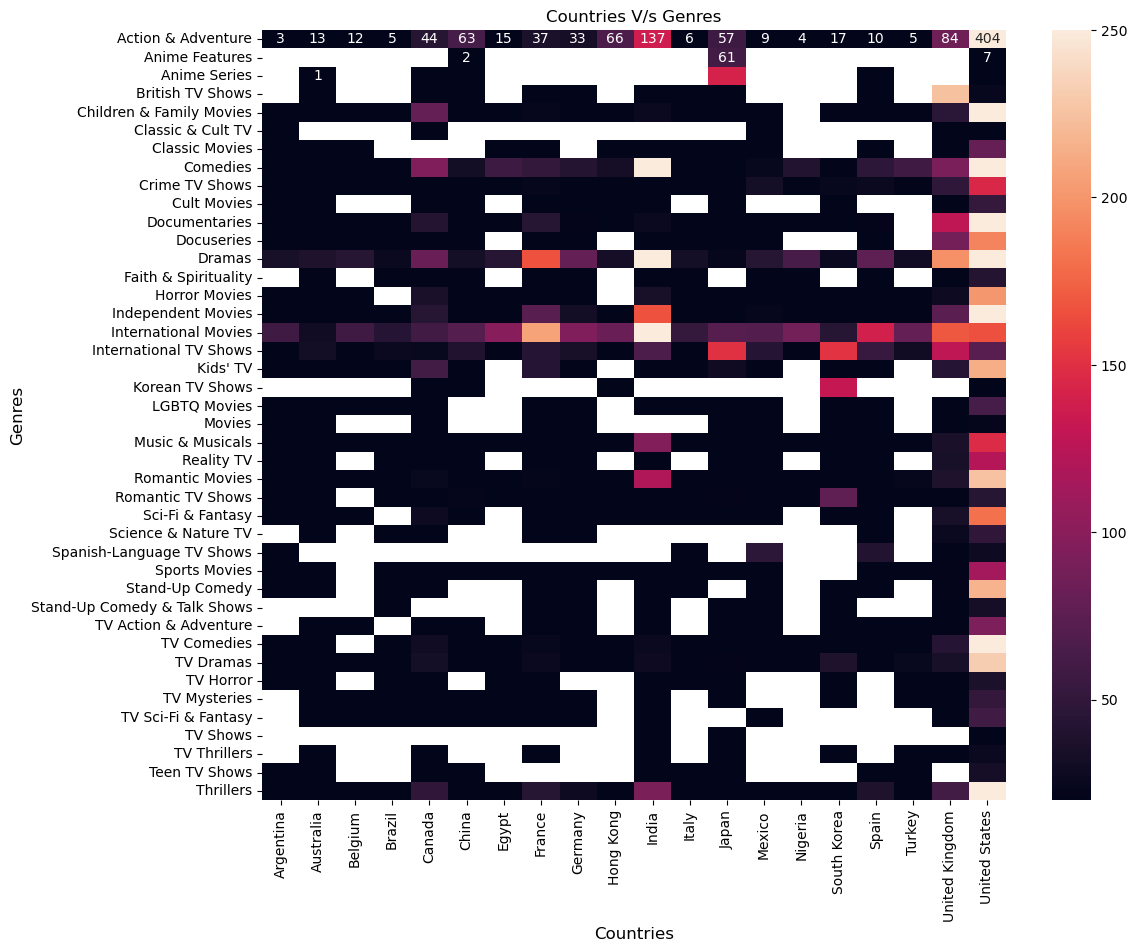

In [154]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

Observation: 

1. Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, 
TV Dramas, Thrillers.
2. Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), 
Spanish TV Shows (Argentina, Mexico and Spain).
3. United States and UK have a good mix of almost all genres.
4. Maximum International movies are produced in India.

In [155]:
# Country-wise Rating of Content
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [156]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

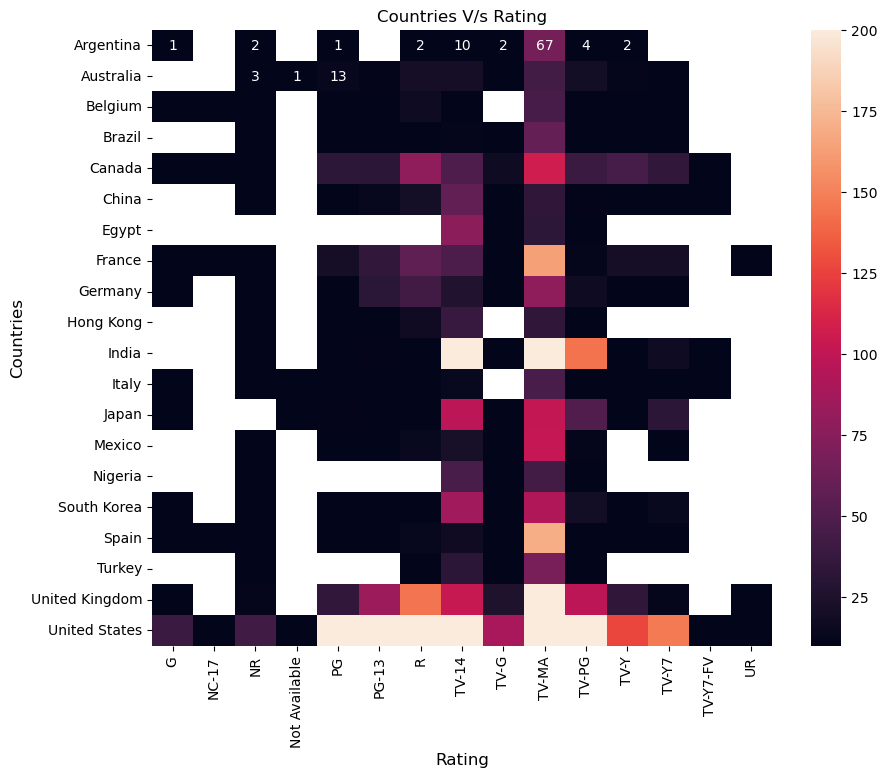

In [157]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)

Observation:  

1. Overall, Netflix has an large amount of adult content across all countries (TV-MA & TV-14).
2. India also has many titles rated TV-PG, other than TV-MA & TV-14.
3. Only US, Canada, UK, France and Japan have content for young audiences (TV-Y & TV-Y7).
4. There is scarce content for general audience (TV-G & G) across all countries except US.

In [158]:
# The top actors by country
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

,country,cast,show_id
49405,United States,Tara Strong,22
48330,United States,Samuel L. Jackson,22
40463,United States,Fred Tatasciore,21
35733,United States,Adam Sandler,20
41672,United States,James Franco,19


In [159]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [160]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)


In [161]:
# top 5 actors in top countries and their movies/tv shows count
top_5_actors

,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


<Axes: xlabel='show_id', ylabel='cast'>

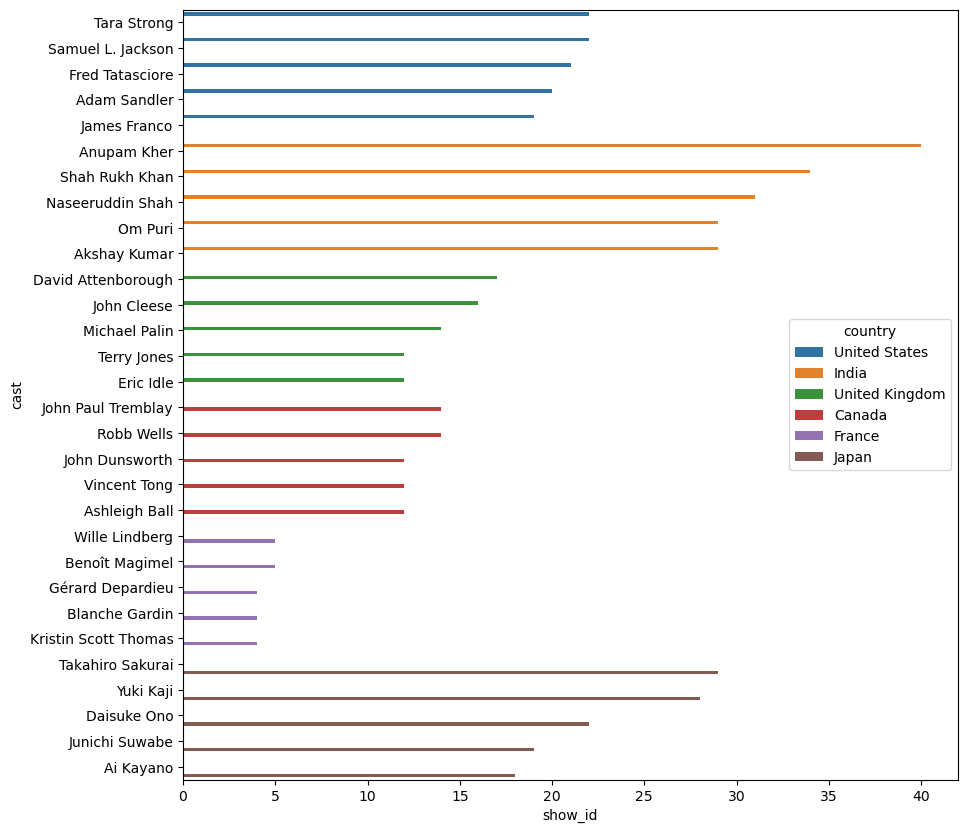

In [162]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

In [163]:
# top 5 actor by genre
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
550,Action & Adventure,S.S. Rajamouli,7
651,Action & Adventure,Toshiya Shinohara,7
215,Action & Adventure,Hidenori Inoue,7
606,Action & Adventure,Steven Spielberg,5
1215,Children & Family Movies,Rajiv Chilaka,22
1303,Children & Family Movies,Suhas Kadav,16
1211,Children & Family Movies,Prakash Satam,7
1241,Children & Family Movies,Robert Rodriguez,7
1288,Children & Family Movies,Steve Ball,6


In [164]:
# Top 5 genres in each country
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [165]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Independent Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


(0.0, 200.0)

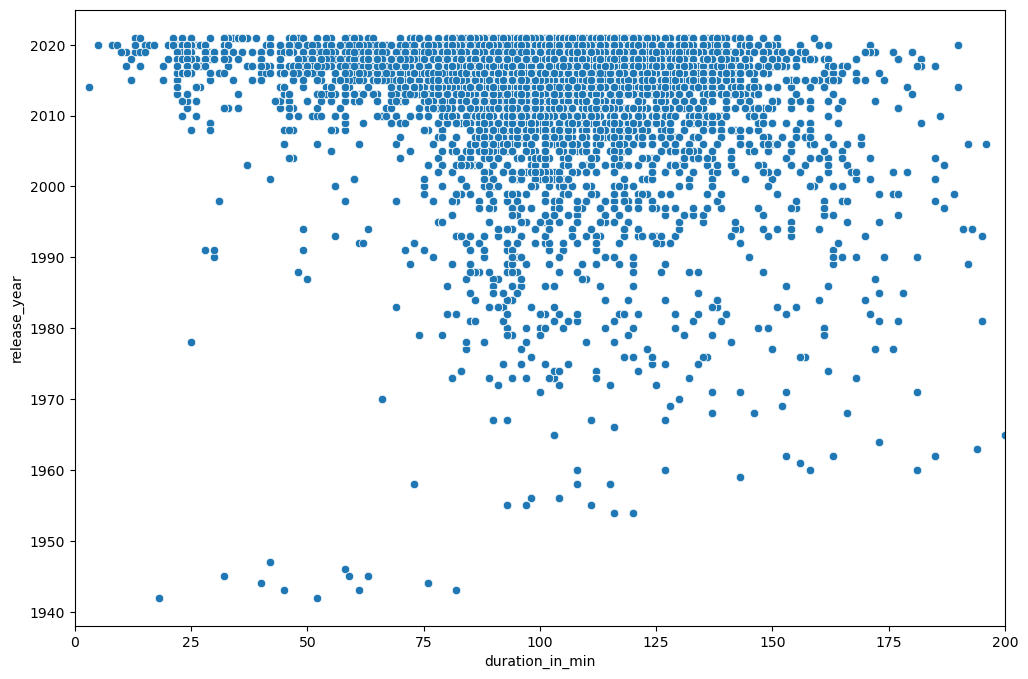

In [166]:
# Variation in duration of movies by Release year
plt.figure(figsize = (12,8))
sns.scatterplot(x = movies['duration_in_min'], y=movies['release_year'])
plt.xlim((0,200))

Observation
1. The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
2. There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

In [167]:
# What is the best time of the year when maximum content get added on the Netflix?
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

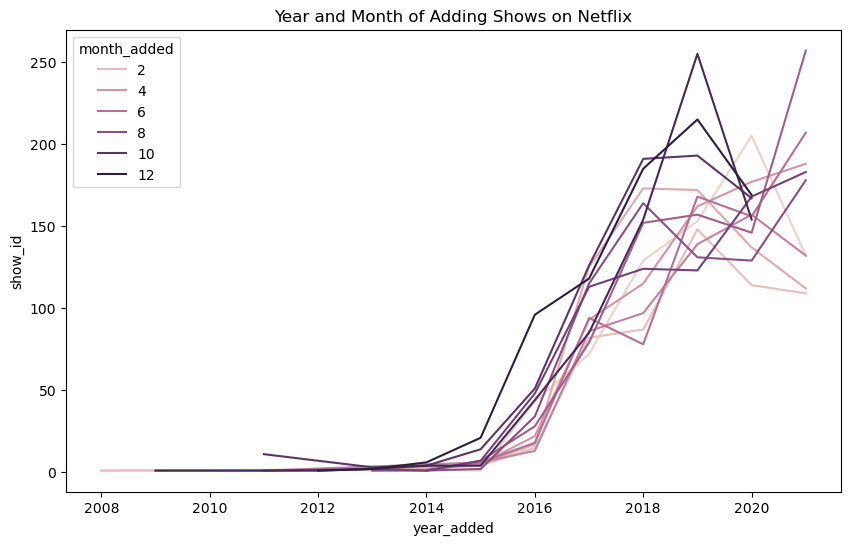

In [168]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

Observation: 

The number of shows getting added is increasing with each year until 2020.
Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. 
This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

In [169]:
#  Which countries are adding more number of content over the time?
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']


In [170]:
country_year = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

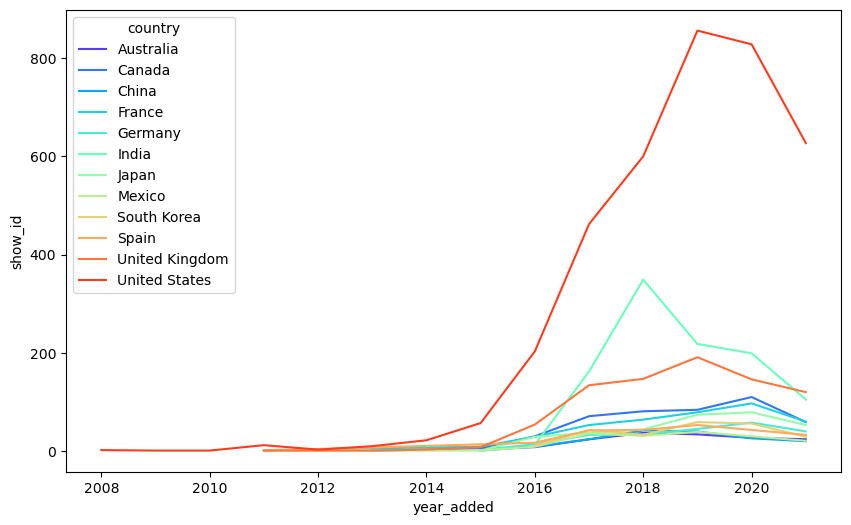

In [171]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

Observation: 

United Stated have always added highset number of movies/TV shows over the time. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

In [172]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [173]:
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
movie_type = country_year.loc[country_year.type_x == 'Movie'].groupby(['country_x' , 'year_added'])['show_id'].count().reset_index()
tv_type = country_year.loc[country_year.type_x == 'TV Show'].groupby(['country_x' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

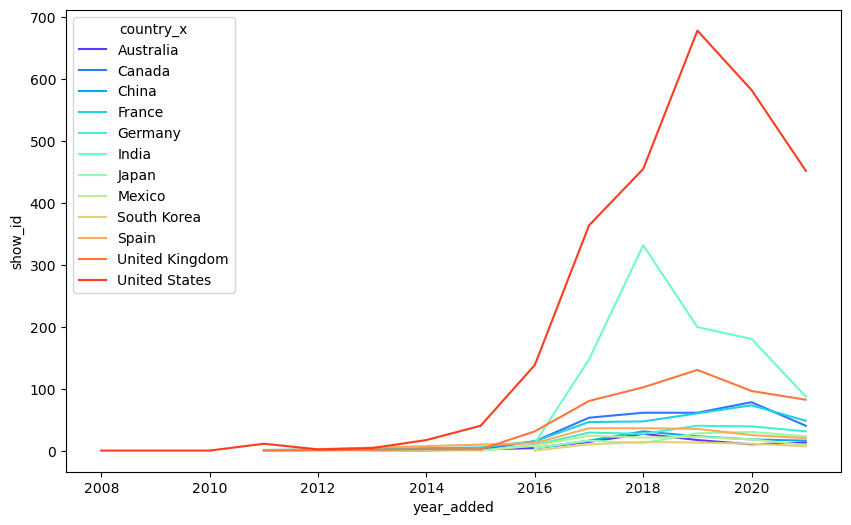

In [174]:
plt.figure(figsize = (10,6))
sns.lineplot(data = movie_type , x = 'year_added' , y = 'show_id' , hue = 'country_x' , palette ='rainbow' )

<Axes: xlabel='year_added', ylabel='show_id'>

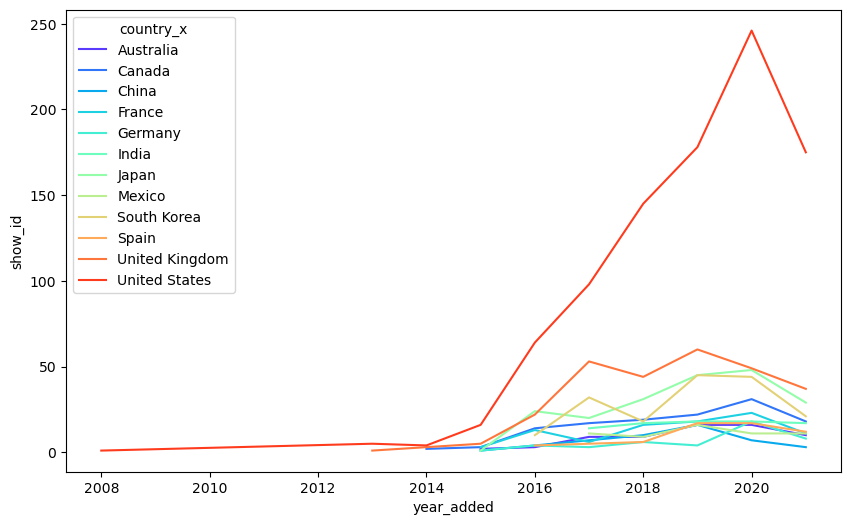

In [175]:
plt.figure(figsize = (10,6))
sns.lineplot(data = tv_type , x = 'year_added' , y = 'show_id' , hue = 'country_x' , palette ='rainbow' )

Observation: 

It is observed that United States tops in both movies and TV Shows. India is at 2nd positon in movies but In TV shows United Kingdom is at 2nd position, followed by India ,South Korea , Australia. It shows in countries like United Kingdom , South Korea , Australia TV Shows popularity is rising more than movies

Insights based on Non-Graphical and Visual Analysis:  

1. Around 70% content on Netflix is Movies and around 30% content is TV shows.
2. The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
3. Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
4. Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
5. Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
6. Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
7. The release year for shows is concentrated in the range 2005-2021.
8. 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
9. 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
10. various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
11. Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
12. International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
13. Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
14. Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
15. Shorter duration movies have been popular in last 10 years.

Business Insights:


1. Netflix have majority of content which is released after the year 2000. It is observed that the content older than year 2000 is very scarce on Netflix. Senior Citizen could be the target audience for such content, which is almost missing currently.
Maximum content (more than 80%) is
   a. TV-MA - Content intended for mature audiences aged 17 and above.
   b. TV-14 - Content suitable for viewers aged 14 and above.
   c. TV-PG - Parental guidance suggested (similar ratings - PG-13 , PG)
   d. R - Restricted Content, that may not be suitable for viewers under age 17.
2. These ratings' movies target Matured and Adult audience. Rest 20 % of the content is for kids aged below 13. It shows that Netflix is currently serving mostly Mature audiences or Children with parental guidance.
3.  popular genres on Netflix are International Movies and TV Shows , Dramas , Comedies, Action & Adventure, Children & Family Movies, Thrillers.
4. Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.
5. Liking towards the shorter duration content is on the rise. (duration 75 to 150 minutes and seasons 1 to 3) This can be considered while production of new content on Netflix.
6. drop in content is seen across all the countries and type of content in year 2020 and 2021, possibly because of Pandemic.

Recommendations: 

1. Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region. eg. Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.
   
2. Country specific insights - The content need to be targetting the demographic of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. Eg.
The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .

3. Country Japan have only 3 rating of content largely served - TV-MA, TV-14 , TV-PG. Japan have high population of age above 60, and this can be served by increasing the content suitable for this age group.

4. Netflix is currently serving mostly Mature audiences or Children with parental guidance. It have scope to cater other audiences as well such as familymen , Senior citizen , kids of various age etc.